In [83]:
import networkx as nx
import random
import numpy as np
import nx_landmarks as nx_l
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
# G = nx.watts_strogatz_graph(n = 1000, k = 10, p = 0.5, seed = 10)
G = nx.read_adjlist('snacs2025-student4888456-medium.tsv')
G = nx.convert_node_labels_to_integers(G)
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
G = nx.convert_node_labels_to_integers(G0)

In [5]:
D = nx_l.landmarks(G,10,'close')

In [6]:
D.shortest_path_estimation_upper_bound(source=1, target=748)

6

In [7]:
D.shortest_path_estimation_lower_bound(source=1, target=748)

3

In [8]:
nx.shortest_path_length(G, 1, 748)

5

In [62]:
#Get a set of nodes and test the accuracy of the estimations 
#look at estimations that are off and analyze their properties (degree, )
estimated_distance_matirx = np.zeros((G.number_of_nodes(),G.number_of_nodes()))
estimated_distance_matirx_lower = np.zeros((G.number_of_nodes(),G.number_of_nodes()))
distance_matrix = np.zeros((G.number_of_nodes(),G.number_of_nodes()))
degree_matrix = np.zeros((G.number_of_nodes(),G.number_of_nodes()))
source_degree_matrix = np.zeros((G.number_of_nodes(),G.number_of_nodes()))
target_degree_matrix = np.zeros((G.number_of_nodes(),G.number_of_nodes()))
range_matrix = np.zeros((G.number_of_nodes(),G.number_of_nodes()))


for source in list(G.nodes()):
    for target in list(G.nodes())[source+1:]:
        upper = D.shortest_path_estimation_upper_bound(source, target)
        lower = D.shortest_path_estimation_lower_bound(source, target)
        estimated_distance_matirx[source,target] = estimated_distance_matirx[target, source] = upper
        estimated_distance_matirx_lower[source,target] = estimated_distance_matirx_lower[target, source] = lower
        range_matrix[source,target] = range_matrix[target, source] = upper - lower
        distance_matrix[source,target] = distance_matrix[target, source] = nx.shortest_path_length(G,source, target)
        degree_matrix[source,target] = degree_matrix[target, source] = G.degree(source)+G.degree(target)
        source_degree_matrix[source,target] = degree_matrix[target, source] = G.degree(source)
        target_degree_matrix[source,target] = degree_matrix[target, source] = G.degree(source)

error_matrix = estimated_distance_matirx-distance_matrix

In [162]:
bad_nodes = np.where(error_matrix >10)
print(len(np.concatenate((bad_nodes[0],bad_nodes[1]))))
bad_nodes_u = np.unique(np.concatenate((bad_nodes[0],bad_nodes[1])))
print(len(bad_nodes_u))

2956
131


In [161]:
for node in bad_nodes_u:
    print(f'Node: {node}; Landmark Distance: {(D.embeddings[node-1])}, error: {np.max(error_matrix[node])}')

Node: 30; Landmark Distance: [ 9.  8.  9.  8.  7. 10.  9.  9.  9.  9.], error: 12.0
Node: 31; Landmark Distance: [8. 7. 8. 7. 6. 9. 8. 8. 8. 8.], error: 12.0
Node: 39; Landmark Distance: [ 9.  8.  9.  8.  7. 10.  9.  9.  9.  9.], error: 12.0
Node: 49; Landmark Distance: [8. 7. 8. 7. 6. 9. 8. 8. 8. 8.], error: 12.0
Node: 82; Landmark Distance: [8. 7. 8. 7. 6. 9. 8. 8. 8. 8.], error: 12.0
Node: 106; Landmark Distance: [8. 7. 8. 7. 6. 9. 8. 8. 8. 8.], error: 12.0
Node: 107; Landmark Distance: [8. 7. 8. 7. 6. 9. 8. 8. 8. 8.], error: 12.0
Node: 108; Landmark Distance: [ 9.  8.  9.  8.  7. 10.  9.  9.  9.  9.], error: 12.0
Node: 140; Landmark Distance: [ 9.  8.  9.  8.  7. 10.  9.  9.  9.  9.], error: 12.0
Node: 184; Landmark Distance: [ 9.  8.  9.  8.  7. 10.  9.  9.  9.  9.], error: 12.0
Node: 369; Landmark Distance: [8. 7. 8. 7. 6. 9. 8. 8. 8. 8.], error: 12.0
Node: 373; Landmark Distance: [ 9.  8.  9.  8.  7. 10.  9.  9.  9.  9.], error: 14.0
Node: 377; Landmark Distance: [10.  9. 10.  9

In [ ]:
error = []

for node in G.nodes():

C:\Users\jaspe\AppData\Local\Temp\ipykernel_25104\138010395.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


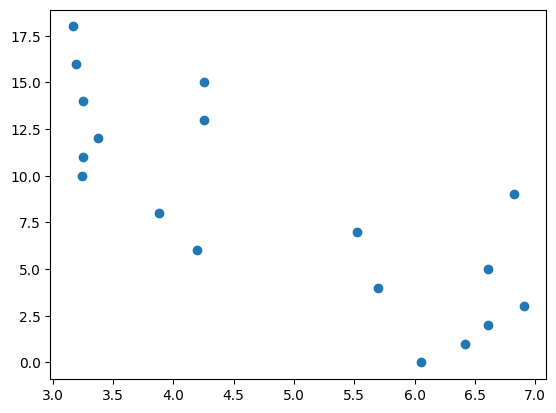

In [72]:
error_degree_realation = {}

for k,v in zip(error_matrix.flatten(),degree_matrix.flatten()):
    if k in error_degree_realation.keys():
        error_degree_realation[k].append(v)
    else:
        error_degree_realation[k] = [v]

fig, ax = plt.subplots()
ax.scatter([np.average(deg) for deg in error_degree_realation.values()],error_degree_realation.keys())
fig.show()

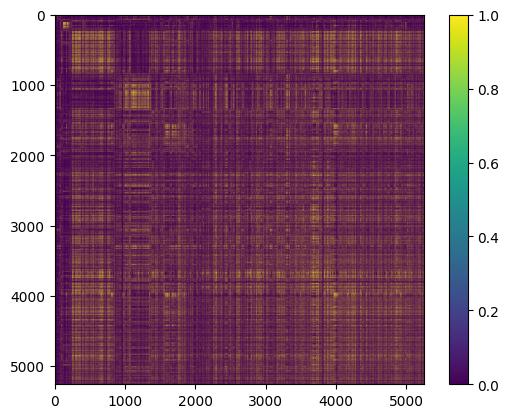

In [10]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(error_matrix >=1)
plt.colorbar()
plt.show()

In [30]:
range_error_dict = {k:[] for k in range(0,21)}
for r in zip(range_matrix.flatten(), error_matrix.flatten()):
    range_error_dict[r[0]].append(r[1])
range_error_dict_avg = {k:np.average(v) for k,v in range_error_dict.items()}

c:\Users\jaspe\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:571: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\jaspe\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:144: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


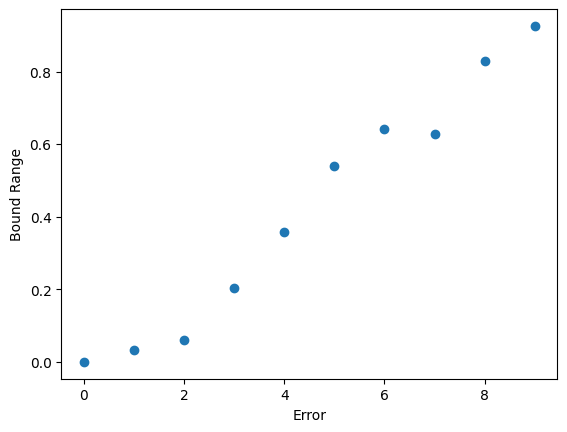

In [ ]:
fig, ax = plt.subplots()
a = 10
ax.scatter(list(range_error_dict_avg.keys())[:a], list(range_error_dict_avg.values())[:a])
ax.set_ylabel('Bound Range')
ax.set_xlabel('Error')
plt.show()

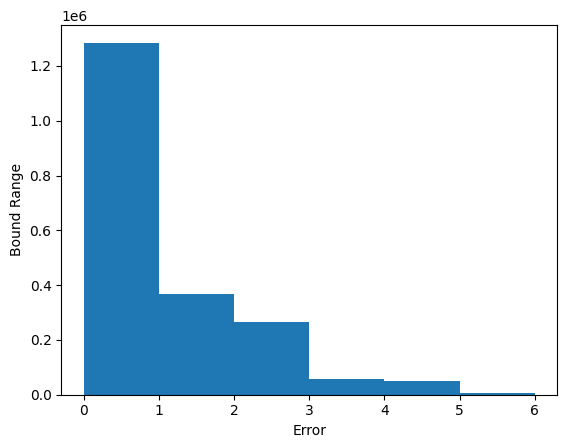

In [59]:
fig, ax = plt.subplots()
a = 6
ax.hist(range_error_dict[a], bins=int(max(range_error_dict[a])))
ax.set_ylabel('Bound Range')
ax.set_xlabel('Error')
plt.show()